In [13]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [14]:
x_train.shape

(25000,)

In [15]:
len(x_train[0])

218

In [16]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [17]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 搭建网络

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

[0.7510499954223633, 0.8784499764442444, 0.9108499884605408, 0.9274500012397766, 0.9374499917030334, 0.9446499943733215, 0.9483500123023987, 0.9527000188827515, 0.9576500058174133, 0.9599499702453613]


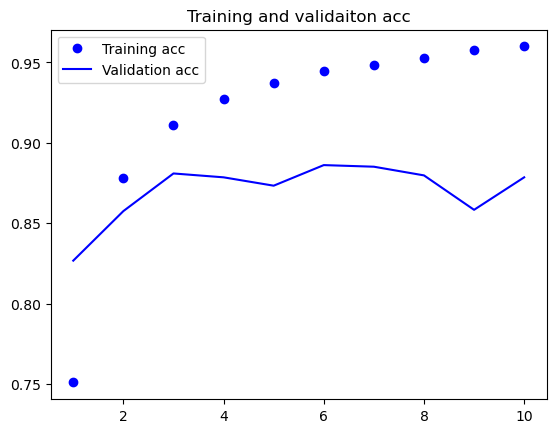

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validaiton acc')

plt.legend()

plt.show()

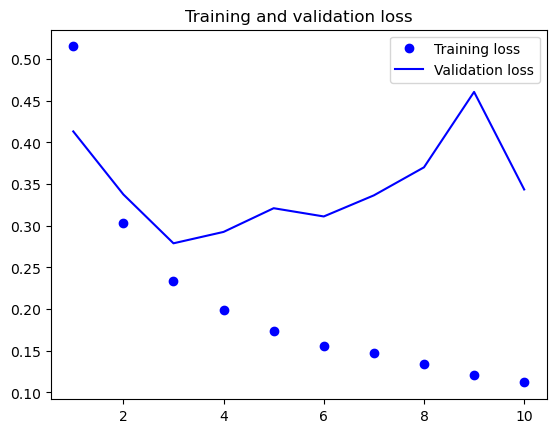

In [25]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 205ms/step - loss: 0.5268 - acc: 0.7442 - val_loss: 0.3415 - val_acc: 0.8626
Epoch 2/10
157/157 [==============================] - 29s 186ms/step - loss: 0.2986 - acc: 0.8793 - val_loss: 0.2864 - val_acc: 0.8872
Epoch 3/10
157/157 [==============================] - 24s 150ms/step - loss: 0.2382 - acc: 0.9107 - val_loss: 0.2943 - val_acc: 0.8870
Epoch 4/10
157/157 [==============================] - 20s 127ms/step - loss: 0.2032 - acc: 0.9252 - val_loss: 0.3078 - val_acc: 0.8676
Epoch 5/10
157/157 [==============================] - 18s 117ms/step - loss: 0.1833 - acc: 0.9337 - val_loss: 0.3400 - val_acc: 0.8830
Epoch 6/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1587 - acc: 0.9431 - val_loss: 0.3045 - val_acc: 0.8848
Epoch 7/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1516 - acc: 0.9473 - val_loss: 0.3076 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 1

[0.7441999912261963, 0.8792999982833862, 0.9107499718666077, 0.9251999855041504, 0.9337499737739563, 0.943149983882904, 0.9472500085830688, 0.9521999955177307, 0.9565500020980835, 0.9613999724388123]


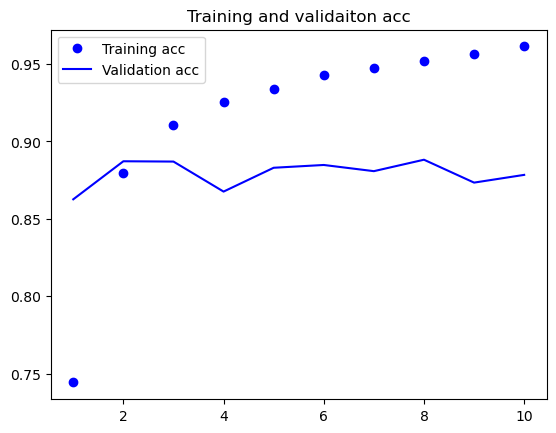

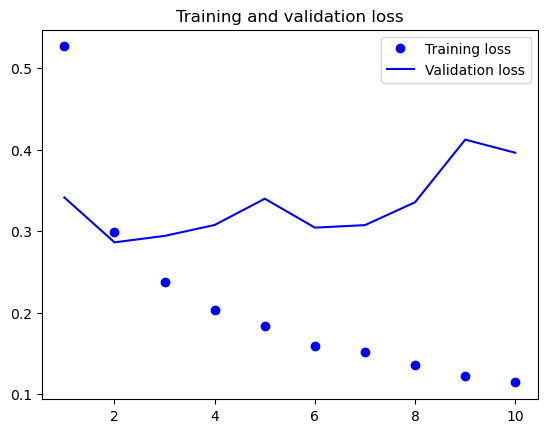

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validaiton acc')

plt.legend()

plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()